# Structure Factors

### Christina Lee
### Category: Prerequisites
### Prerequisites: Monte Carlo Ferromagnet, Statistical Mechanics

\begin{equation}
S(q)= \bigg| \sum_i S^{\perp}_i \exp^{i q \cdot x} \bigg|^2
\end{equation}

In [1]:
push!(LOAD_PATH,".")
using Lattices;
using PyPlot

Instead of going into calculating all the lattice parameters again, we will use a class I define in the file Lattices.jl .  This class contains

Lattice Types
* Chain
* Square
* Honeycomb
You can edit the file to make your own types.

Once a lattice is created, it contains <b>Members of Type</b>:
* `name`, a string
* `l`, length in number of unit cells
* `dim`, dimension of lattice
* `a`, array containing the basis vectors by which positions are generated
* `unit`, array of positions inside a single unit
* `N`, number of total sites
* `X`, array of positions
* `nnei`, number of nearest neighbors
* `neigh`, Array of nearest neighbors [i][j], where i is site and j is 1:nnei

Today, I will just look at the square lattice, since that indicates much of the standard phase transition properties.  Some of the lattices I have shown (kagome, triangular, ...) are special frustrated lattices, and thus will behave very wierdly in this situation.

In [38]:
## Define l here
l=20;

lt=MakeLattice("Square",l);
S=ones(Int8,l,l);  #Our spins
dt=1/(lt.N);

In [39]:
# The energy contribution of just one site
function dE(i::Int)
    Eii=0;
    for j in 1:lt.nnei
        Eii+=S[lt.neigh[i,j]];
    end
    Eii*=-J*S[i];  # we are computing J sz_i sz_j for one i
    return Eii;
end
# The energy of the entire lattice
function E()
    Evar=0;
    for k in 1:lt.N
        Evar+=.5*dE(k);
    end
    return Evar;
end
# The magnetization of the entire lattice
function M()
    Mvar=0;
    for k in 1:lt.N
        Mvar+=S[k];
    end
    return Mvar;
end
"defined functions"

"defined functions"

 overwritten at In[39]:3.


# Adjustable Parameters

I have set up the simulation so that you can perform two different things.  For one, you can set `video=true` and `t` to a small variable.  Then in a new window you see what the configuration looks like each time you measure.  

Or you can set `video=false` and `t` to a large variable, and actually measure the statistics for the system over a bunch of configurations. 

In [40]:
beta=.1;
J=-1;
t=10000;
video=false;
nskip=10;   # don't measure every sweep= better decorrelation
"Parameters set"

In [41]:
nmeas=Int64(t/nskip); # how many times we will measure
Ma=Array{Int32}(nmeas); # our magnetization measurements
Ea=Array{Int32}(nmeas); # our energy measurements
"done"

In [59]:
plan_fft(S,1:2)
brillshift=exp(pi*im*repmat(collect(1:l),1,l))
brillshift2=exp(pi*im*repmat(transpose(collect(1:l)),l,1))

20×20 Array{Complex{Float64},2}:
 -1.0+1.22465e-16im  1.0-2.44929e-16im  …  1.0-2.44929e-15im
 -1.0+1.22465e-16im  1.0-2.44929e-16im     1.0-2.44929e-15im
 -1.0+1.22465e-16im  1.0-2.44929e-16im     1.0-2.44929e-15im
 -1.0+1.22465e-16im  1.0-2.44929e-16im     1.0-2.44929e-15im
 -1.0+1.22465e-16im  1.0-2.44929e-16im     1.0-2.44929e-15im
 -1.0+1.22465e-16im  1.0-2.44929e-16im  …  1.0-2.44929e-15im
 -1.0+1.22465e-16im  1.0-2.44929e-16im     1.0-2.44929e-15im
 -1.0+1.22465e-16im  1.0-2.44929e-16im     1.0-2.44929e-15im
 -1.0+1.22465e-16im  1.0-2.44929e-16im     1.0-2.44929e-15im
 -1.0+1.22465e-16im  1.0-2.44929e-16im     1.0-2.44929e-15im
 -1.0+1.22465e-16im  1.0-2.44929e-16im  …  1.0-2.44929e-15im
 -1.0+1.22465e-16im  1.0-2.44929e-16im     1.0-2.44929e-15im
 -1.0+1.22465e-16im  1.0-2.44929e-16im     1.0-2.44929e-15im
 -1.0+1.22465e-16im  1.0-2.44929e-16im     1.0-2.44929e-15im
 -1.0+1.22465e-16im  1.0-2.44929e-16im     1.0-2.44929e-15im
 -1.0+1.22465e-16im  1.0-2.44929e-16im  …  1.0-2.449

In [65]:
tm=1; #Our measurement time step
Sq=zeros(Float64,l,l)
Sq2=zeros(Float64,l,l)
Sq3=zeros(Float64,l,l)
Sq4=zeros(Float64,l,l)
for ti in 1:t
    for j in 1:lt.N
        i = rand(1:lt.N); #Choosing a random site
        de=dE(i);
        if(de>0 || rand()<exp(2*beta*de) ) 
            S[i]=-S[i]; #Switch the sign
        end
    end
    if isapprox(mod(ti,nskip),0)
        Ma[tm]=M();
        Ea[tm]=E();
        
        Sq+=abs(fft(S,1:2)).^2
        Sq2+=abs(fft(S.*brillshift,1:2)).^2
        Sq3+=abs(fft(S.*brillshift2,1:2)).^2
        Sq4+=abs(fft(S.*brillshift.*brillshift2,1:2)).^2
        tm+=1;
        
    end
end
Mave=mean(Ma/lt.N);
Mstd=std(Ma/lt.N);
Eave=mean(Ea/lt.N);
Estd=std(Ea/lt.N);
Mave, Mstd

(0.0012650000000000014,0.04116636302182213)

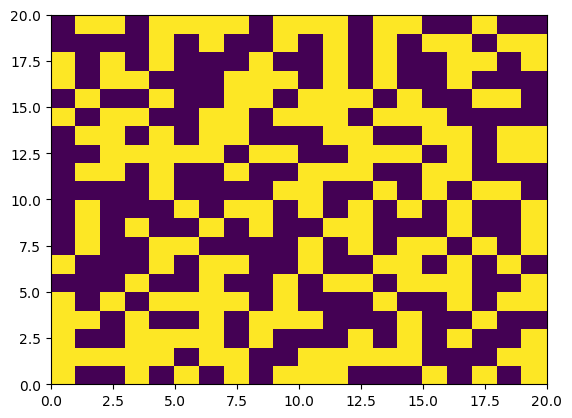

PyObject <matplotlib.collections.PolyCollection object at 0x000000001F101780>

In [16]:
pcolor(S)

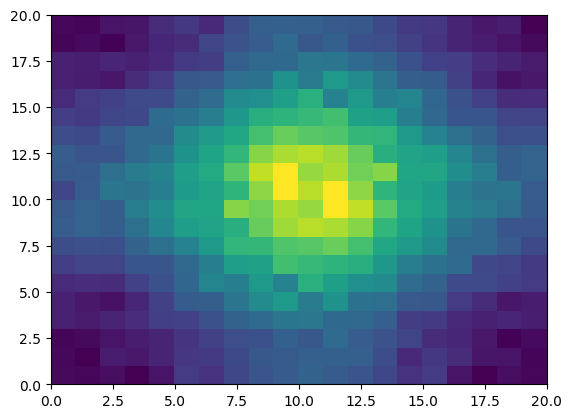

PyObject <matplotlib.collections.PolyCollection object at 0x00000000284169E8>

In [56]:
pcolor(Sq)

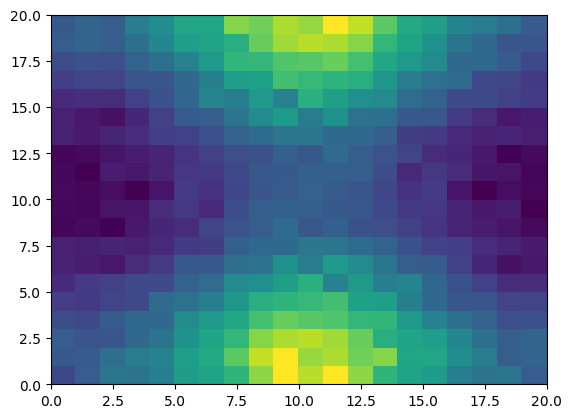

PyObject <matplotlib.collections.PolyCollection object at 0x00000000287B2E10>

In [57]:
pcolor(Sq2)

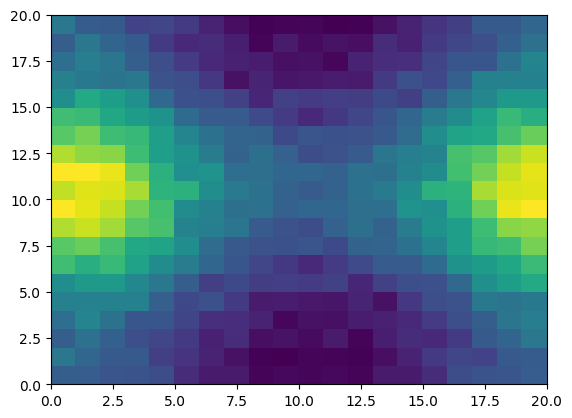

PyObject <matplotlib.collections.PolyCollection object at 0x0000000028AC8A90>

In [62]:
pcolor(Sq3)

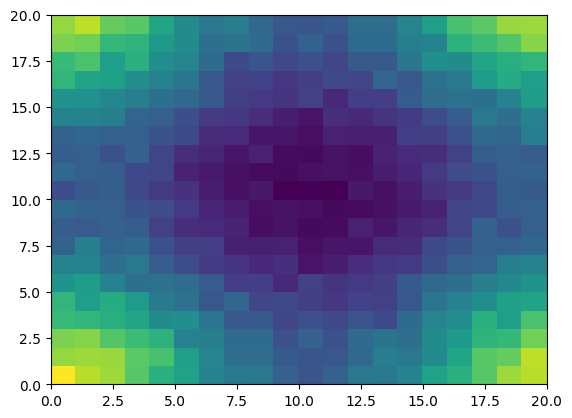

PyObject <matplotlib.collections.PolyCollection object at 0x00000000291A2470>

In [66]:
pcolor(Sq4)

In [17]:
[collect(1:lt.N) lt.X]

400×3 Array{Int64,2}:
   1   1   1
   2   2   1
   3   3   1
   4   4   1
   5   5   1
   6   6   1
   7   7   1
   8   8   1
   9   9   1
  10  10   1
  11  11   1
  12  12   1
  13  13   1
   ⋮        
 389   9  20
 390  10  20
 391  11  20
 392  12  20
 393  13  20
 394  14  20
 395  15  20
 396  16  20
 397  17  20
 398  18  20
 399  19  20
 400  20  20

In [18]:
[collect(1:lt.N) lt.neigh]

400×7 Array{Int64,2}:
   1    2   20  21  381   22  400
   2    3    1  22  382  383   21
   3    4    2  23  383   24  382
   4    5    3  24  384  385   23
   5    6    4  25  385   26  384
   6    7    5  26  386  387   25
   7    8    6  27  387   28  386
   8    9    7  28  388  389   27
   9   10    8  29  389   30  388
  10   11    9  30  390  391   29
  11   12   10  31  391   32  390
  12   13   11  32  392  393   31
  13   14   12  33  393   34  392
   ⋮                       ⋮     
 389  390  388   9  369  370    8
 390  391  389  10  370   11  369
 391  392  390  11  371  372   10
 392  393  391  12  372   13  371
 393  394  392  13  373  374   12
 394  395  393  14  374   15  373
 395  396  394  15  375  376   14
 396  397  395  16  376   17  375
 397  398  396  17  377  378   16
 398  399  397  18  378   19  377
 399  400  398  19  379  380   18
 400  381  399  20  380    1  379

# To be covered later:

This is an extremely rich problem.  Since this post seems long enough for me already, I'll leave these to exercises for you right now, or you can wait until I hold your hand through them.  

* Plot magnetization and energy as a function of temperature
* What's the transition temperature?
* How does the dispersion change as a function of temperature? Use that to calculate specific heat and susceptibility
* How do results change with system size?  
* Change dimension?
* Put it on a different lattice.  BE CAREFUL of lattices like triangular, checkerboard, pyrochlore, ...
* Ferromagnetic versus Antiferromagnetic coupling
* Autocorrelation function
* Structure Factor (Fourier transform) 


In [43]:
exp(2*pi*im*repmat(collect(1:l),1,l))

20×20 Array{Complex{Float64},2}:
 1.0-2.44929e-16im  1.0-2.44929e-16im  …  1.0-2.44929e-16im
 1.0-4.89859e-16im  1.0-4.89859e-16im     1.0-4.89859e-16im
 1.0-7.34788e-16im  1.0-7.34788e-16im     1.0-7.34788e-16im
 1.0-9.79717e-16im  1.0-9.79717e-16im     1.0-9.79717e-16im
 1.0-1.22465e-15im  1.0-1.22465e-15im     1.0-1.22465e-15im
 1.0-1.46958e-15im  1.0-1.46958e-15im  …  1.0-1.46958e-15im
 1.0-1.71451e-15im  1.0-1.71451e-15im     1.0-1.71451e-15im
 1.0-1.95943e-15im  1.0-1.95943e-15im     1.0-1.95943e-15im
 1.0-2.20436e-15im  1.0-2.20436e-15im     1.0-2.20436e-15im
 1.0-2.44929e-15im  1.0-2.44929e-15im     1.0-2.44929e-15im
 1.0-9.79965e-15im  1.0-9.79965e-15im  …  1.0-9.79965e-15im
 1.0-2.93915e-15im  1.0-2.93915e-15im     1.0-2.93915e-15im
 1.0+3.92135e-15im  1.0+3.92135e-15im     1.0+3.92135e-15im
 1.0-3.42901e-15im  1.0-3.42901e-15im     1.0-3.42901e-15im
 1.0-1.07794e-14im  1.0-1.07794e-14im     1.0-1.07794e-14im
 1.0-3.91887e-15im  1.0-3.91887e-15im  …  1.0-3.91887e-15im
 1.0+2.

In [47]:
pi*im*repmat(collect(1:l),1,l)

20×20 Array{Complex{Float64},2}:
 0.0+3.14159im  0.0+3.14159im  0.0+3.14159im  …  0.0+3.14159im  0.0+3.14159im
 0.0+6.28319im  0.0+6.28319im  0.0+6.28319im     0.0+6.28319im  0.0+6.28319im
 0.0+9.42478im  0.0+9.42478im  0.0+9.42478im     0.0+9.42478im  0.0+9.42478im
 0.0+12.5664im  0.0+12.5664im  0.0+12.5664im     0.0+12.5664im  0.0+12.5664im
 0.0+15.708im   0.0+15.708im   0.0+15.708im      0.0+15.708im   0.0+15.708im 
 0.0+18.8496im  0.0+18.8496im  0.0+18.8496im  …  0.0+18.8496im  0.0+18.8496im
 0.0+21.9911im  0.0+21.9911im  0.0+21.9911im     0.0+21.9911im  0.0+21.9911im
 0.0+25.1327im  0.0+25.1327im  0.0+25.1327im     0.0+25.1327im  0.0+25.1327im
 0.0+28.2743im  0.0+28.2743im  0.0+28.2743im     0.0+28.2743im  0.0+28.2743im
 0.0+31.4159im  0.0+31.4159im  0.0+31.4159im     0.0+31.4159im  0.0+31.4159im
 0.0+34.5575im  0.0+34.5575im  0.0+34.5575im  …  0.0+34.5575im  0.0+34.5575im
 0.0+37.6991im  0.0+37.6991im  0.0+37.6991im     0.0+37.6991im  0.0+37.6991im
 0.0+40.8407im  0.0+40.8407im  

In [25]:
Sq

20×20 Array{Complex{Float64},2}:
  -2268.0+0.0im       2872.27-961.988im  …   2872.27+961.988im
  1077.42+1753.85im   -1410.3+1429.02im      461.333-1045.99im
  2514.15-197.738im   1168.03+421.287im      37.6062+3116.81im
 -2334.72-398.401im    95.703-807.352im      502.192-2316.73im
  1035.07+1485.62im    404.57-1725.22im      83.4158-1907.91im
   2582.0-1558.0im    1822.09-708.207im  …   2996.86+675.033im
 -406.152+4209.77im   3976.93-1775.37im      -309.88-1036.98im
 -1157.62-5562.75im   -5630.6-240.419im     -119.135-633.381im
 -1751.07-340.96im    -2462.1-1349.62im     -3761.96-1343.79im
  2862.92+2972.99im   2091.92-3779.26im      92.4096-255.068im
  -3496.0+0.0im       3017.91+335.692im  …   3017.91-335.692im
  2862.92-2972.99im   92.4096+255.068im      2091.92+3779.26im
 -1751.07+340.96im   -3761.96+1343.79im      -2462.1+1349.62im
 -1157.62+5562.75im  -119.135+633.381im      -5630.6+240.419im
 -406.152-4209.77im   -309.88+1036.98im      3976.93+1775.37im
   2582.0+1558.0im    

In [32]:
S

20×20 Array{Int8,2}:
  1  -1  -1   1  -1   1  -1   1  -1  …   1  -1  -1  -1   1  -1   1  -1   1
  1   1   1   1   1  -1   1   1  -1      1   1   1   1  -1  -1  -1   1   1
  1  -1  -1   1   1   1   1  -1   1     -1   1  -1   1  -1   1  -1  -1   1
  1   1  -1   1  -1  -1   1  -1   1     -1  -1  -1   1  -1  -1   1  -1  -1
  1  -1   1  -1   1   1   1   1  -1     -1  -1   1  -1  -1   1  -1   1   1
 -1  -1  -1   1  -1  -1   1  -1  -1  …   1   1  -1   1   1   1  -1  -1   1
  1  -1  -1  -1   1  -1   1   1  -1     -1  -1   1   1  -1   1  -1   1  -1
 -1   1  -1  -1   1   1  -1  -1  -1     -1   1  -1   1   1  -1   1  -1   1
 -1   1  -1   1  -1  -1   1  -1   1      1   1  -1  -1  -1   1  -1  -1   1
 -1   1  -1  -1  -1   1  -1   1   1     -1   1  -1   1  -1   1  -1  -1   1
 -1  -1  -1  -1   1  -1  -1  -1  -1  …  -1  -1   1  -1   1  -1   1   1  -1
 -1   1   1  -1   1  -1  -1   1  -1      1   1  -1  -1   1   1  -1  -1  -1
 -1  -1   1   1   1   1   1  -1   1     -1   1   1   1  -1   1  -1   1   1
 -1 